# 4.9 Task2 Data Visualization

## Contents
### Import Libraries and dataframe
### Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.
### Create a histogram of the “order_hour_of_day” column
### Create a bar chart from the "loyalty_flag" column
### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.
### Create a line chart exploring the connections between age and number of dependents
### Create a scatterplot of age vs income

# Import Libraries and dataframe

In [6]:
# import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
# assign path
path = r'C:\Users\Jack Bartman\OneDrive\CareerFoundry\Instacart Basket Analysis'

In [16]:
# import dataframe
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

# create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

In [22]:
# create a bar chart

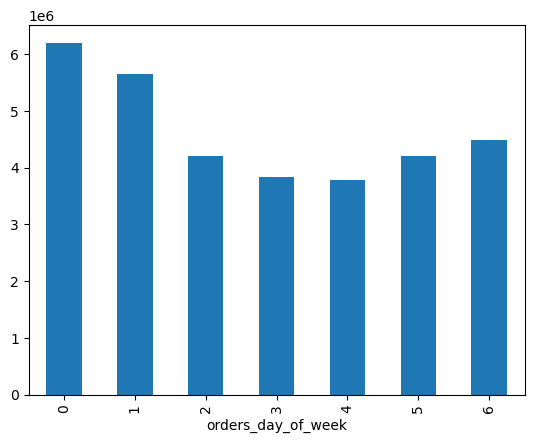

In [30]:
bar=ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [32]:
# export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9-bar_orders_dow.png'))

In [34]:
# Create histogram

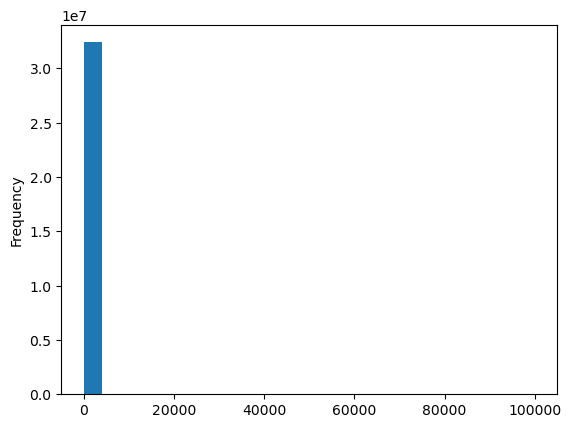

In [36]:
hist=ords_prods_cust['prices'].plot.hist(bins = 25)

In [38]:
# mark prices over $100 as missing
ords_prods_cust.loc[ords_prods_cust['prices'] >100, 'prices'] = np.nan

In [42]:
ords_prods_cust['prices'].max()

25.0

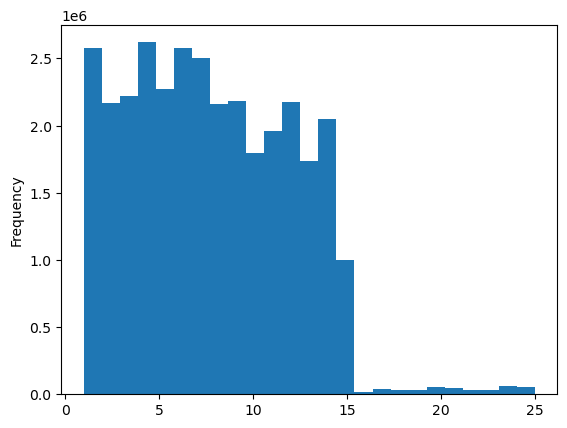

In [46]:
hist=ords_prods_cust['prices'].plot.hist(bins = 25)

In [48]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9-hist_prices.png'))

In [50]:
# save changes to ords_prods_cust
ords_prods_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))

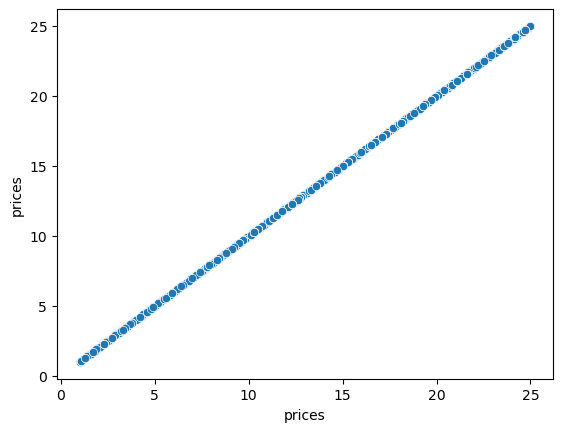

In [52]:
# create a scatter plot
scat=sns.scatterplot(x='prices', y='prices', data=ords_prods_cust)

In [54]:
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9-scat_prices.png'))

In [56]:
# create a line chart with a sample subset

In [58]:
# sample data (30% subset)

In [62]:
# setting random numbers
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.3

In [64]:
# defining small df
df = ords_prods_cust[dev]

In [66]:
# defining smaller df
df_2 = df[['orders_day_of_week', 'prices']]

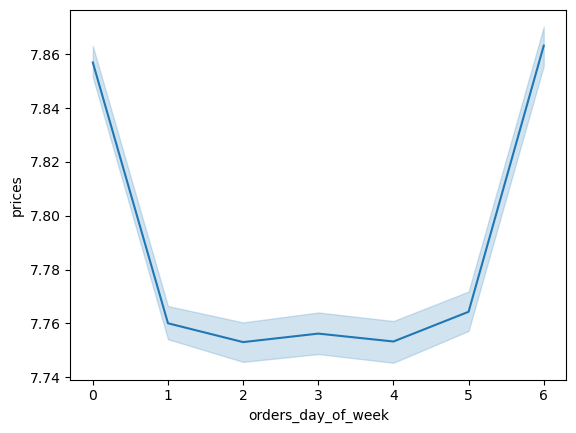

In [68]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [70]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9-line_prices_dow.png'))

# Create a histogram of the “order_hour_of_day” column

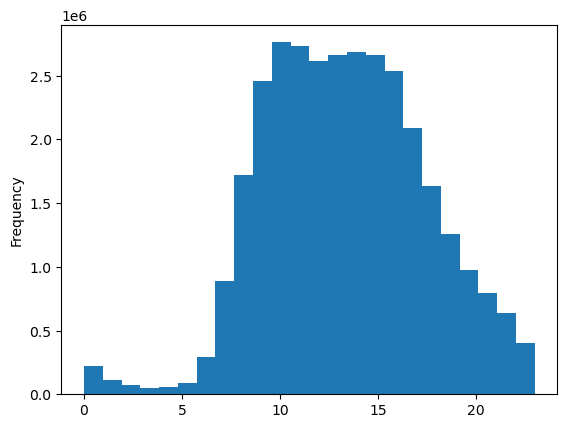

In [75]:
hist2=ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

This histogram shows that most purchases are between 9am and 5pm

In [79]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9-hist_ohd.png'))

# Create a bar chart from the "loyalty_flag" column

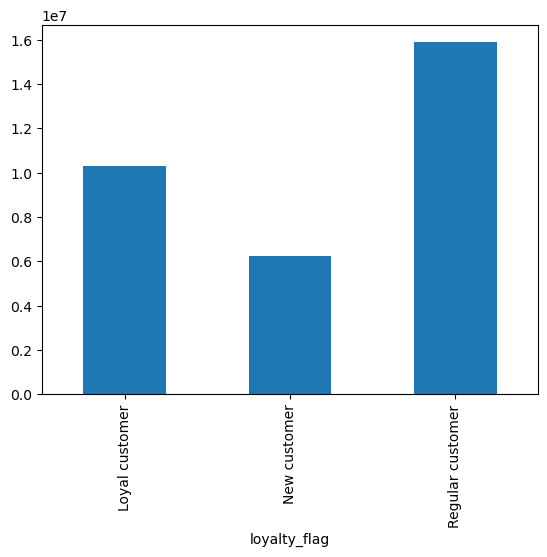

In [82]:
bar2=ords_prods_cust['loyalty_flag'].value_counts().sort_index().plot.bar()

In [84]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9-bar_loyalty.png'))

# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [87]:
# using the same 30% subset sample from previous line chart exercise

In [89]:
# defining smaller df
df_3 = df[['order_hour_of_day', 'prices']]

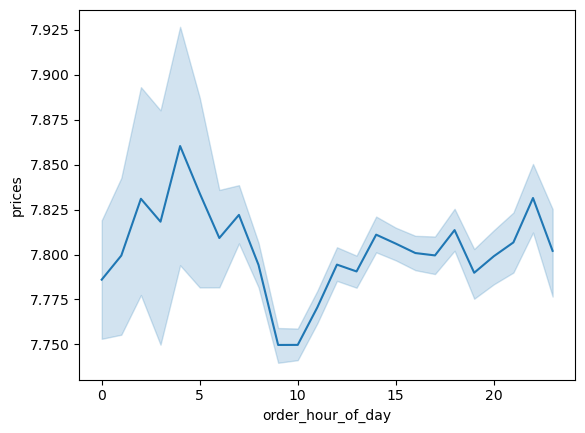

In [93]:
line = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [95]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9-line_prices_ohd.png'))

# Create a line chart exploring the connections between age and number of dependents

In [100]:
# using the same 30% subset sample from previous line chart exercise

In [102]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
5,2398795,1,prior,2,3,7,15.0,False,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
7,2398795,1,prior,2,3,7,15.0,False,12427,3,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2398795,1,prior,2,3,7,15.0,False,13176,4,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
11,473747,1,prior,3,3,12,21.0,False,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
14,473747,1,prior,3,3,12,21.0,False,25133,4,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [104]:
# defining smaller df
df_4 = df[['age', 'n_dependants']]

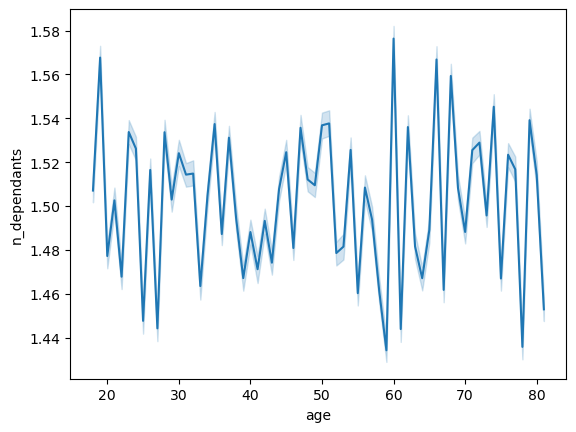

In [106]:
line2 = sns.lineplot(data = df_4, x = 'age',y = 'n_dependants')

This is saying that the number of dependents versus age is very random. This seems very counter intuitive to me. it seems like those between mid 20's and 50 would have more dependants and the rest very few.

In [109]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9-line_age_dep.png'))

# Create a scatterplot of age vs income

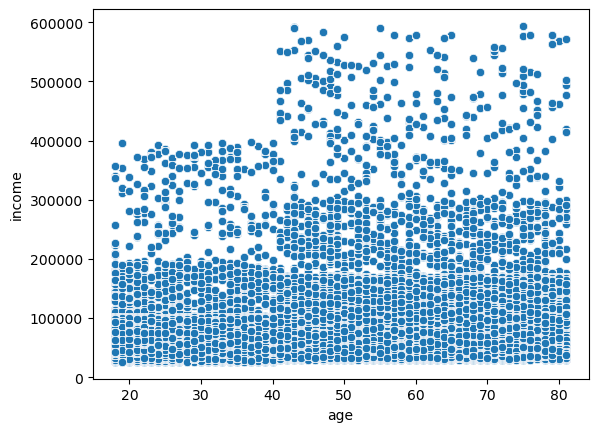

In [112]:
scat2=sns.scatterplot(x='age', y='income', data=ords_prods_cust)

Most people all make less than 200,000 regardless of age, but the posh people who make over 400,000 tend to be over 40 years old.

In [120]:
scat2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9-scat_age_income.png'))